In [106]:
import pandas as pd #Veri analizi
import numpy as np #Hesaplamalar
import matplotlib.pyplot as plt #Veri görselleştirme
import seaborn as sns #Veri görselleştirme

In [107]:
data = pd.read_excel("cekilen_veriler.xlsx") #Veriler okunarak bir DataFrame oluşturuldu

In [108]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Buzluk Tipi               595 non-null    object 
 1   Derinlik                  473 non-null    object 
 2   Dondurucu Yeri            482 non-null    object 
 3   Dondurucu Ã–zelliÄŸi      0 non-null      float64
 4   Dondurucu Özelliği        625 non-null    object 
 5   Enerji SÄ±nÄ±fÄ±          0 non-null      float64
 6   Enerji Sınıfı             622 non-null    object 
 7   Garanti SÃ¼resi           0 non-null      float64
 8   Garanti Süresi            625 non-null    object 
 9   Garanti Tipi              67 non-null     object 
 10  Genişlik                  2 non-null      object 
 11  KullanÄ±m Åžekli          0 non-null      float64
 12  Kullanım Şekli            8 non-null      object 
 13  Kurulum Gerekli mi?       3 non-null      object 
 14  Renk      

In [109]:
#Bozuk sütunları veri setinden çıkar
data=data.drop(["Dondurucu Ã–zelliÄŸi","Enerji SÄ±nÄ±fÄ±","Garanti SÃ¼resi","KullanÄ±m Åžekli","Ãœcretsiz Kurulum/Montaj"],axis=1)

In [110]:
data.columns

Index(['Buzluk Tipi', 'Derinlik', 'Dondurucu Yeri', 'Dondurucu Özelliği',
       'Enerji Sınıfı', 'Garanti Süresi', 'Garanti Tipi', 'Genişlik',
       'Kullanım Şekli', 'Kurulum Gerekli mi?', 'Renk', 'Tip', 'Toplam Hacim',
       'Ücretsiz Kurulum/Montaj', 'urls', 'prices', 'marks'],
      dtype='object')

In [111]:
data.head(50)

,Buzluk Tipi,Derinlik,Dondurucu Yeri,Dondurucu Özelliği,Enerji Sınıfı,Garanti Süresi,Garanti Tipi,Genişlik,Kullanım Şekli,Kurulum Gerekli mi?,Renk,Tip,Toplam Hacim,Ücretsiz Kurulum/Montaj,urls,prices,marks
0,Standart,72 cm,Üstte,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//vestel/nf52101-no-fr...,15.100 TL,VESTEL
1,Standart,54 cm,Üstte,Statik,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Yok,https://www.trendyol.com//vestel/sc25001-250-l...,8.790 TL,VESTEL
2,Standart,NaN,Üstte,No Frost,F,2 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,526-550 L,Var,https://www.trendyol.com//profilo/bd2076wfxn-5...,24.279 TL,Profilo
3,Standart,48 cm,Üstte,Statik,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Tezgah Altı,NaN,Yok,https://www.trendyol.com//vestel/sb9001-mini-b...,4.775 TL,VESTEL
4,Kartuşlu,NaN,Altta,No Frost,E,3 Yıl,NaN,NaN,NaN,NaN,NaN,Gardırop Tipi,601+ L,Var,https://www.trendyol.com//lg/gr-q31fmkhl-insta...,109.899 TL,LG
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.trendyol.com//vestel/380lt-inox-no...,13.999 TL,VESTEL
6,Standart,NaN,Üstte,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,426-450 L,Var,https://www.trendyol.com//vestel/nf48001-x-no-...,17.250 TL,VESTEL
7,Standart,73 cm,Altta,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//samsung/rb50rs334sa-...,32.999 TL,Samsung
8,Standart,72 cm,Altta,No Frost,E,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//profilo/ceyiz-paketi...,89.990 TL,Profilo
9,Standart,70 cm,Altta,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//vestel/nfk48001-no-f...,18.440 TL,VESTEL


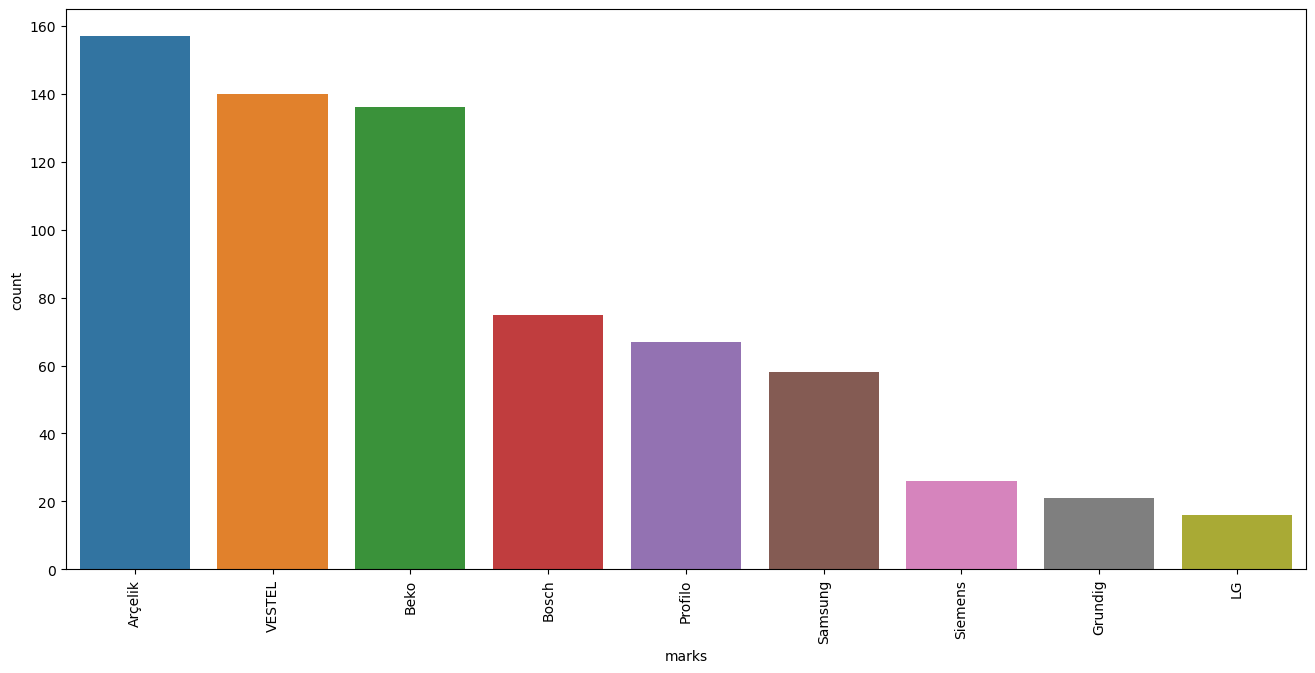

In [112]:
plt.figure(figsize=(16,16)) #Çizim boyutları belirlendi
plt.subplot(2,1,1) #Alt grafik düzeni oluşturuldu ve ilk grafik seçildi
sns.countplot(x='marks',data=data,order=data['marks'].value_counts().index) #'marks' sütununa göre veri setindeki markaların sayısını gösteren bir çubuk grafik oluşturuldu
plt.xticks(rotation=90) #x eksenindeki etiketlerin dikey yazılmasını sağlayan dönüşüm yapıldı
plt.show() #Oluşturulan çizimler ekranda gösterildi

In [113]:
#"prices" sütunundaki değerlerdeki nokta karakterleri (.) boşluk karakteriyle değiştirildi
data["prices"] = data["prices"].str.replace(".", "") 

In [114]:
data["prices"]

0       15100 TL
1        8790 TL
2       24279 TL
3        4775 TL
4      109899 TL
         ...    
691     38799 TL
692     44249 TL
693     41499 TL
694     31600 TL
695     39000 TL
Name: prices, Length: 696, dtype: object

In [115]:
#"prices" sütunundaki değerlerden "TL" ifadesi kaldırıldı
data["prices"]=data.prices.str.replace('TL', '')

In [116]:
data

,Buzluk Tipi,Derinlik,Dondurucu Yeri,Dondurucu Özelliği,Enerji Sınıfı,Garanti Süresi,Garanti Tipi,Genişlik,Kullanım Şekli,Kurulum Gerekli mi?,Renk,Tip,Toplam Hacim,Ücretsiz Kurulum/Montaj,urls,prices,marks
0,Standart,72 cm,Üstte,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//vestel/nf52101-no-fr...,15100,VESTEL
1,Standart,54 cm,Üstte,Statik,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Yok,https://www.trendyol.com//vestel/sc25001-250-l...,8790,VESTEL
2,Standart,NaN,Üstte,No Frost,F,2 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,526-550 L,Var,https://www.trendyol.com//profilo/bd2076wfxn-5...,24279,Profilo
3,Standart,48 cm,Üstte,Statik,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Tezgah Altı,NaN,Yok,https://www.trendyol.com//vestel/sb9001-mini-b...,4775,VESTEL
4,Kartuşlu,NaN,Altta,No Frost,E,3 Yıl,NaN,NaN,NaN,NaN,NaN,Gardırop Tipi,601+ L,Var,https://www.trendyol.com//lg/gr-q31fmkhl-insta...,109899,LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Twist,73 cm,Altta,No Frost,D,3 Yıl,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//vestel/nfk54021-cb-g...,38799,VESTEL
692,Standart,76 cm,Altta,No Frost,D,3 Yıl,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//beko/678551-ei-551-l...,44249,Beko
693,Standart,74 cm,Altta,No Frost,F,2 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//grundig/gkne-7201-i-...,41499,Grundig
694,Standart,72 cm,Üstte,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//samsung/rt47cb6622c1...,31600,Samsung


In [117]:
#"prices" sütunundaki değerlerdeki virgül karakterleri (,) nokta karakteriyle (.) değiştirildi
data["prices"] = data["prices"].str.replace(",", ".")

In [118]:
#"prices" sütunundaki değerler float veri tipine dönüştürüldü
data["prices"]=data.prices.str.extract('(\d+\d+|\d+)').astype(float)

In [119]:
data.head(50)

,Buzluk Tipi,Derinlik,Dondurucu Yeri,Dondurucu Özelliği,Enerji Sınıfı,Garanti Süresi,Garanti Tipi,Genişlik,Kullanım Şekli,Kurulum Gerekli mi?,Renk,Tip,Toplam Hacim,Ücretsiz Kurulum/Montaj,urls,prices,marks
0,Standart,72 cm,Üstte,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//vestel/nf52101-no-fr...,15100.0,VESTEL
1,Standart,54 cm,Üstte,Statik,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Yok,https://www.trendyol.com//vestel/sc25001-250-l...,8790.0,VESTEL
2,Standart,NaN,Üstte,No Frost,F,2 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,526-550 L,Var,https://www.trendyol.com//profilo/bd2076wfxn-5...,24279.0,Profilo
3,Standart,48 cm,Üstte,Statik,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Tezgah Altı,NaN,Yok,https://www.trendyol.com//vestel/sb9001-mini-b...,4775.0,VESTEL
4,Kartuşlu,NaN,Altta,No Frost,E,3 Yıl,NaN,NaN,NaN,NaN,NaN,Gardırop Tipi,601+ L,Var,https://www.trendyol.com//lg/gr-q31fmkhl-insta...,109899.0,LG
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.trendyol.com//vestel/380lt-inox-no...,13999.0,VESTEL
6,Standart,NaN,Üstte,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,426-450 L,Var,https://www.trendyol.com//vestel/nf48001-x-no-...,17250.0,VESTEL
7,Standart,73 cm,Altta,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//samsung/rb50rs334sa-...,32999.0,Samsung
8,Standart,72 cm,Altta,No Frost,E,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//profilo/ceyiz-paketi...,89990.0,Profilo
9,Standart,70 cm,Altta,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//vestel/nfk48001-no-f...,18440.0,VESTEL


In [120]:
data["prices"]

0       15100.0
1        8790.0
2       24279.0
3        4775.0
4      109899.0
         ...   
691     38799.0
692     44249.0
693     41499.0
694     31600.0
695     39000.0
Name: prices, Length: 696, dtype: float64

In [121]:
data.head()

,Buzluk Tipi,Derinlik,Dondurucu Yeri,Dondurucu Özelliği,Enerji Sınıfı,Garanti Süresi,Garanti Tipi,Genişlik,Kullanım Şekli,Kurulum Gerekli mi?,Renk,Tip,Toplam Hacim,Ücretsiz Kurulum/Montaj,urls,prices,marks
0,Standart,72 cm,Üstte,No Frost,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//vestel/nf52101-no-fr...,15100.0,VESTEL
1,Standart,54 cm,Üstte,Statik,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Yok,https://www.trendyol.com//vestel/sc25001-250-l...,8790.0,VESTEL
2,Standart,NaN,Üstte,No Frost,F,2 Yıl,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,526-550 L,Var,https://www.trendyol.com//profilo/bd2076wfxn-5...,24279.0,Profilo
3,Standart,48 cm,Üstte,Statik,F,3 Yıl,NaN,NaN,NaN,NaN,NaN,Tezgah Altı,NaN,Yok,https://www.trendyol.com//vestel/sb9001-mini-b...,4775.0,VESTEL
4,Kartuşlu,NaN,Altta,No Frost,E,3 Yıl,NaN,NaN,NaN,NaN,NaN,Gardırop Tipi,601+ L,Var,https://www.trendyol.com//lg/gr-q31fmkhl-insta...,109899.0,LG


In [122]:
#Sütun isimleri değiştirildi, her bir sütunun yeni adı belirtildi
data=data.rename(columns={'Buzluk Tipi':'Buzluk_Tipi','Derinlik':'Derinlik','Dondurucu Yeri':'Dondurucu_Yeri','Dondurucu Özelliği':'Dondurucu_Ozelligi','Enerji Sınıfı':'Enerji_Sinifi','Garanti Süresi':'Garanti_Suresi','Garanti Tipi':'Garanti_Tipi','Genişlik':'Genislik','Kullanım Şekli':'Kullanim_Sekli','Kurulum Gerekli mi?':'Kurulum_Gerekli_Mi','Renk':'Renk','Tip':'Tip','Toplam Hacim':'Toplam_Hacim','Ücretsiz Kurulum/Montaj':'Ucretsiz_Kurulum_Var_Mi','urls':'urls','prices':'Fiyat','marks':'Markalar'})

In [123]:
data["Buzluk_Tipi"] #"Buzluk_Tipi" sütunundaki veriler

0      Standart
1      Standart
2      Standart
3      Standart
4      Kartuşlu
         ...   
691       Twist
692    Standart
693    Standart
694    Standart
695    Standart
Name: Buzluk_Tipi, Length: 696, dtype: object

In [124]:
data["Derinlik"]

0      72 cm
1      54 cm
2        NaN
3      48 cm
4        NaN
       ...  
691    73 cm
692    76 cm
693    74 cm
694    72 cm
695    75 cm
Name: Derinlik, Length: 696, dtype: object

In [125]:
#"Derinlik" sütunundaki değerlerden "cm" ifadesi kaldırıldı
data["Derinlik"]=data.Derinlik.str.replace('cm', '')

In [126]:
data["Derinlik"]

0      72 
1      54 
2      NaN
3      48 
4      NaN
      ... 
691    73 
692    76 
693    74 
694    72 
695    75 
Name: Derinlik, Length: 696, dtype: object

In [127]:
data["Dondurucu_Yeri"]

0      Üstte
1      Üstte
2      Üstte
3      Üstte
4      Altta
       ...  
691    Altta
692    Altta
693    Altta
694    Üstte
695    Altta
Name: Dondurucu_Yeri, Length: 696, dtype: object

In [128]:
data["Enerji_Sinifi"]

0      F
1      F
2      F
3      F
4      E
      ..
691    D
692    D
693    F
694    F
695    E
Name: Enerji_Sinifi, Length: 696, dtype: object

In [129]:
data["Garanti_Suresi"]

0      3 Yıl
1      3 Yıl
2      2 Yıl
3      3 Yıl
4      3 Yıl
       ...  
691    3 Yıl
692    3 Yıl
693    2 Yıl
694    3 Yıl
695    3 Yıl
Name: Garanti_Suresi, Length: 696, dtype: object

In [130]:
data["Garanti_Suresi"]=data.Garanti_Suresi.str.replace('Yıl', '')

In [131]:
data["Garanti_Suresi"]

0      3 
1      3 
2      2 
3      3 
4      3 
       ..
691    3 
692    3 
693    2 
694    3 
695    3 
Name: Garanti_Suresi, Length: 696, dtype: object

In [132]:
data["Garanti_Tipi"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
691    NaN
692    NaN
693    NaN
694    NaN
695    NaN
Name: Garanti_Tipi, Length: 696, dtype: object

In [133]:
data["Genislik"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
691    NaN
692    NaN
693    NaN
694    NaN
695    NaN
Name: Genislik, Length: 696, dtype: object

In [134]:
data["Kullanim_Sekli"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
691    NaN
692    NaN
693    NaN
694    NaN
695    NaN
Name: Kullanim_Sekli, Length: 696, dtype: object

In [135]:
data["Kurulum_Gerekli_Mi"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
691    NaN
692    NaN
693    NaN
694    NaN
695    NaN
Name: Kurulum_Gerekli_Mi, Length: 696, dtype: object

In [136]:
data["Renk"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
691    NaN
692    NaN
693    NaN
694    NaN
695    NaN
Name: Renk, Length: 696, dtype: object

In [137]:
data["Tip"]

0        Çift Kapılı
1        Çift Kapılı
2        Çift Kapılı
3        Tezgah Altı
4      Gardırop Tipi
           ...      
691       Kombi Tipi
692       Kombi Tipi
693      Çift Kapılı
694      Çift Kapılı
695       Kombi Tipi
Name: Tip, Length: 696, dtype: object

In [138]:
data["Dondurucu_Ozelligi"]

0      No Frost
1        Statik
2      No Frost
3        Statik
4      No Frost
         ...   
691    No Frost
692    No Frost
693    No Frost
694    No Frost
695    No Frost
Name: Dondurucu_Ozelligi, Length: 696, dtype: object

In [139]:
data["Toplam_Hacim"]

0            NaN
1            NaN
2      526-550 L
3            NaN
4         601+ L
         ...    
691          NaN
692          NaN
693          NaN
694          NaN
695          NaN
Name: Toplam_Hacim, Length: 696, dtype: object

In [140]:
#"Toplam_Hacim" sütunundaki değerlerden "L" ve '+' ifadeleri kaldırıldı
data["Toplam_Hacim"]=data.Toplam_Hacim.str.replace('L', '')
data["Toplam_Hacim"]=data.Toplam_Hacim.str.replace('+', '')

In [141]:
data["Toplam_Hacim"]

0           NaN
1           NaN
2      526-550 
3           NaN
4          601 
         ...   
691         NaN
692         NaN
693         NaN
694         NaN
695         NaN
Name: Toplam_Hacim, Length: 696, dtype: object

In [142]:
data["Ucretsiz_Kurulum_Var_Mi"]

0      Var
1      Yok
2      Var
3      Yok
4      Var
      ... 
691    Var
692    Var
693    Var
694    Var
695    Var
Name: Ucretsiz_Kurulum_Var_Mi, Length: 696, dtype: object

In [143]:
data["Markalar"]

0       VESTEL
1       VESTEL
2      Profilo
3       VESTEL
4           LG
        ...   
691     VESTEL
692       Beko
693    Grundig
694    Samsung
695       Beko
Name: Markalar, Length: 696, dtype: object

In [144]:
data

,Buzluk_Tipi,Derinlik,Dondurucu_Yeri,Dondurucu_Ozelligi,Enerji_Sinifi,Garanti_Suresi,Garanti_Tipi,Genislik,Kullanim_Sekli,Kurulum_Gerekli_Mi,Renk,Tip,Toplam_Hacim,Ucretsiz_Kurulum_Var_Mi,urls,Fiyat,Markalar
0,Standart,72,Üstte,No Frost,F,3,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//vestel/nf52101-no-fr...,15100.0,VESTEL
1,Standart,54,Üstte,Statik,F,3,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Yok,https://www.trendyol.com//vestel/sc25001-250-l...,8790.0,VESTEL
2,Standart,NaN,Üstte,No Frost,F,2,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,526-550,Var,https://www.trendyol.com//profilo/bd2076wfxn-5...,24279.0,Profilo
3,Standart,48,Üstte,Statik,F,3,NaN,NaN,NaN,NaN,NaN,Tezgah Altı,NaN,Yok,https://www.trendyol.com//vestel/sb9001-mini-b...,4775.0,VESTEL
4,Kartuşlu,NaN,Altta,No Frost,E,3,NaN,NaN,NaN,NaN,NaN,Gardırop Tipi,601,Var,https://www.trendyol.com//lg/gr-q31fmkhl-insta...,109899.0,LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Twist,73,Altta,No Frost,D,3,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//vestel/nfk54021-cb-g...,38799.0,VESTEL
692,Standart,76,Altta,No Frost,D,3,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//beko/678551-ei-551-l...,44249.0,Beko
693,Standart,74,Altta,No Frost,F,2,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//grundig/gkne-7201-i-...,41499.0,Grundig
694,Standart,72,Üstte,No Frost,F,3,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//samsung/rt47cb6622c1...,31600.0,Samsung


In [145]:
#"Derinlik" sütunundaki değerlerin ilk üç karakteri alındı.
data['Derinlik'] = data['Derinlik'].str.slice(0, 3)
#"Derinlik" sütunundaki veriler float türüne dönüştürüldü
data["Derinlik"]=data.Derinlik.astype(float)

In [146]:
data

,Buzluk_Tipi,Derinlik,Dondurucu_Yeri,Dondurucu_Ozelligi,Enerji_Sinifi,Garanti_Suresi,Garanti_Tipi,Genislik,Kullanim_Sekli,Kurulum_Gerekli_Mi,Renk,Tip,Toplam_Hacim,Ucretsiz_Kurulum_Var_Mi,urls,Fiyat,Markalar
0,Standart,72.0,Üstte,No Frost,F,3,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//vestel/nf52101-no-fr...,15100.0,VESTEL
1,Standart,54.0,Üstte,Statik,F,3,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Yok,https://www.trendyol.com//vestel/sc25001-250-l...,8790.0,VESTEL
2,Standart,NaN,Üstte,No Frost,F,2,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,526-550,Var,https://www.trendyol.com//profilo/bd2076wfxn-5...,24279.0,Profilo
3,Standart,48.0,Üstte,Statik,F,3,NaN,NaN,NaN,NaN,NaN,Tezgah Altı,NaN,Yok,https://www.trendyol.com//vestel/sb9001-mini-b...,4775.0,VESTEL
4,Kartuşlu,NaN,Altta,No Frost,E,3,NaN,NaN,NaN,NaN,NaN,Gardırop Tipi,601,Var,https://www.trendyol.com//lg/gr-q31fmkhl-insta...,109899.0,LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Twist,73.0,Altta,No Frost,D,3,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//vestel/nfk54021-cb-g...,38799.0,VESTEL
692,Standart,76.0,Altta,No Frost,D,3,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//beko/678551-ei-551-l...,44249.0,Beko
693,Standart,74.0,Altta,No Frost,F,2,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//grundig/gkne-7201-i-...,41499.0,Grundig
694,Standart,72.0,Üstte,No Frost,F,3,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//samsung/rt47cb6622c1...,31600.0,Samsung


In [147]:
data['Derinlik']

0      72.0
1      54.0
2       NaN
3      48.0
4       NaN
       ... 
691    73.0
692    76.0
693    74.0
694    72.0
695    75.0
Name: Derinlik, Length: 696, dtype: float64

In [148]:
#"Garanti_Suresi" sütunundaki değerlerin ilk karakteri alındı
data['Garanti_Suresi'] = data['Garanti_Suresi'].str.slice(0, 1)
#"Garanti_Suresi" sütunundaki veriler float türüne dönüştürüldü
data["Garanti_Suresi"]=data.Garanti_Suresi.astype(float)


In [149]:
data['Garanti_Suresi']

0      3.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
691    3.0
692    3.0
693    2.0
694    3.0
695    3.0
Name: Garanti_Suresi, Length: 696, dtype: float64

In [150]:
data

,Buzluk_Tipi,Derinlik,Dondurucu_Yeri,Dondurucu_Ozelligi,Enerji_Sinifi,Garanti_Suresi,Garanti_Tipi,Genislik,Kullanim_Sekli,Kurulum_Gerekli_Mi,Renk,Tip,Toplam_Hacim,Ucretsiz_Kurulum_Var_Mi,urls,Fiyat,Markalar
0,Standart,72.0,Üstte,No Frost,F,3.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//vestel/nf52101-no-fr...,15100.0,VESTEL
1,Standart,54.0,Üstte,Statik,F,3.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Yok,https://www.trendyol.com//vestel/sc25001-250-l...,8790.0,VESTEL
2,Standart,NaN,Üstte,No Frost,F,2.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,526-550,Var,https://www.trendyol.com//profilo/bd2076wfxn-5...,24279.0,Profilo
3,Standart,48.0,Üstte,Statik,F,3.0,NaN,NaN,NaN,NaN,NaN,Tezgah Altı,NaN,Yok,https://www.trendyol.com//vestel/sb9001-mini-b...,4775.0,VESTEL
4,Kartuşlu,NaN,Altta,No Frost,E,3.0,NaN,NaN,NaN,NaN,NaN,Gardırop Tipi,601,Var,https://www.trendyol.com//lg/gr-q31fmkhl-insta...,109899.0,LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Twist,73.0,Altta,No Frost,D,3.0,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//vestel/nfk54021-cb-g...,38799.0,VESTEL
692,Standart,76.0,Altta,No Frost,D,3.0,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//beko/678551-ei-551-l...,44249.0,Beko
693,Standart,74.0,Altta,No Frost,F,2.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//grundig/gkne-7201-i-...,41499.0,Grundig
694,Standart,72.0,Üstte,No Frost,F,3.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//samsung/rt47cb6622c1...,31600.0,Samsung


In [151]:
#'Toplam_Hacim' sütunundaki her bir değerden ilk üç karakteri alıp, sütuna geri yazıyoruz
data['Toplam_Hacim'] = data['Toplam_Hacim'].str[:3]

#"0" ile başlayan değerleri NaN ile değiştirmek için np.where kullanıyoruz
data['Toplam_Hacim'] = np.where(data['Toplam_Hacim'].str.startswith('0'), np.nan, data['Toplam_Hacim'])

#Boş stringleri NaN ile değiştiriyoruz
data['Toplam_Hacim'].replace('', np.nan, inplace=True)

#'Toplam_Hacim' sütununu float veri tipine dönüştürüyoruz
data['Toplam_Hacim'] = data['Toplam_Hacim'].astype(float)

In [152]:
data['Toplam_Hacim']

0        NaN
1        NaN
2      526.0
3        NaN
4      601.0
       ...  
691      NaN
692      NaN
693      NaN
694      NaN
695      NaN
Name: Toplam_Hacim, Length: 696, dtype: float64

In [153]:
data.head(50)

,Buzluk_Tipi,Derinlik,Dondurucu_Yeri,Dondurucu_Ozelligi,Enerji_Sinifi,Garanti_Suresi,Garanti_Tipi,Genislik,Kullanim_Sekli,Kurulum_Gerekli_Mi,Renk,Tip,Toplam_Hacim,Ucretsiz_Kurulum_Var_Mi,urls,Fiyat,Markalar
0,Standart,72.0,Üstte,No Frost,F,3.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//vestel/nf52101-no-fr...,15100.0,VESTEL
1,Standart,54.0,Üstte,Statik,F,3.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Yok,https://www.trendyol.com//vestel/sc25001-250-l...,8790.0,VESTEL
2,Standart,NaN,Üstte,No Frost,F,2.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,526.0,Var,https://www.trendyol.com//profilo/bd2076wfxn-5...,24279.0,Profilo
3,Standart,48.0,Üstte,Statik,F,3.0,NaN,NaN,NaN,NaN,NaN,Tezgah Altı,NaN,Yok,https://www.trendyol.com//vestel/sb9001-mini-b...,4775.0,VESTEL
4,Kartuşlu,NaN,Altta,No Frost,E,3.0,NaN,NaN,NaN,NaN,NaN,Gardırop Tipi,601.0,Var,https://www.trendyol.com//lg/gr-q31fmkhl-insta...,109899.0,LG
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.trendyol.com//vestel/380lt-inox-no...,13999.0,VESTEL
6,Standart,NaN,Üstte,No Frost,F,3.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,426.0,Var,https://www.trendyol.com//vestel/nf48001-x-no-...,17250.0,VESTEL
7,Standart,73.0,Altta,No Frost,F,3.0,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//samsung/rb50rs334sa-...,32999.0,Samsung
8,Standart,72.0,Altta,No Frost,E,3.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//profilo/ceyiz-paketi...,89990.0,Profilo
9,Standart,70.0,Altta,No Frost,F,3.0,NaN,NaN,NaN,NaN,NaN,Kombi Tipi,NaN,Var,https://www.trendyol.com//vestel/nfk48001-no-f...,18440.0,VESTEL


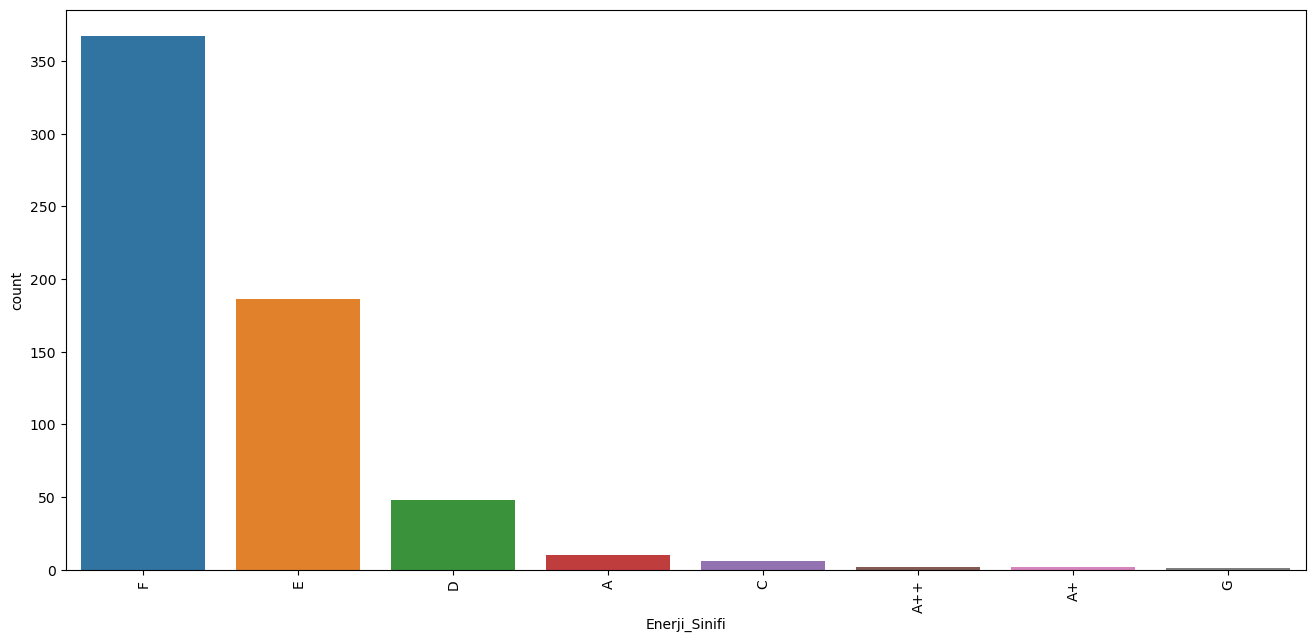

In [154]:
plt.figure(figsize=(16,16)) #Çizim boyutları belirlendi
plt.subplot(2,1,1) #Grafik düzeni oluşturuldu ve ilk grafik seçildi
sns.countplot(x='Enerji_Sinifi',data=data,order=data['Enerji_Sinifi'].value_counts().index) #'Enerji_Sinifi' sütununa göre veri setindeki enerji sınıflarının sayısını gösteren bir çubuk grafik oluşturuldu
plt.xticks(rotation=90) #x eksenindeki etiketlerin dikey yazılmasını sağlayan dönüşüm yapıldı
plt.show() #Oluşturulan çizimler ekranda gösterildi

In [155]:
print("Max Fiyat: "+str(data["Fiyat"].max()).replace('0.0', '')+"TL --> "+str(data["urls"].loc[data["Fiyat"].idxmax()]))
print("Max Derinlik: " + str(data["Derinlik"].max()) + "cm --> " + str(data["urls"].loc[data["Derinlik"].idxmax()]))
print("Max Garanti Süresi: "+str(data["Garanti_Suresi"].max())+"yıl --> "+str(data["urls"].loc[data["Garanti_Suresi"].idxmax()]))
print("Max Toplam Hacim: "+str(data["Toplam_Hacim"].max())+"L --> "+str(data["urls"].loc[data["Toplam_Hacim"].idxmax()]))

print("Min Fiyat: "+str(data["Fiyat"].min()).replace('0.0', '')+"TL --> "+str(data["urls"].loc[data["Fiyat"].idxmin()]))
print("Min Derinlik: " + str(data["Derinlik"].min()) + "cm --> " + str(data["urls"].loc[data["Derinlik"].idxmin()]))
print("Min Garanti Süresi: "+str(data["Garanti_Suresi"].min())+"yıl --> "+str(data["urls"].loc[data["Garanti_Suresi"].idxmin()]))
print("Min Toplam Hacim: "+str(data["Toplam_Hacim"].min())+"L --> "+str(data["urls"].loc[data["Toplam_Hacim"].idxmin()]))


Max Fiyat: 109899.0TL --> https://www.trendyol.com//lg/gr-q31fmkhl-instaview-gardirop-tipi-buzdolabi-p-49571507?boutiqueId=61&merchantId=812996
Max Derinlik: 97.0cm --> https://www.trendyol.com//samsung/triple-cooling-wi-fi-no-frost-gardirop-tipi-buzdolabi-rf85a912ab1-tr-p-136872462?boutiqueId=61&merchantId=107870
Max Garanti Süresi: 7.0yıl --> https://www.trendyol.com//beko/683721-eb-no-frost-buzdolabi-p-353188632?boutiqueId=61&merchantId=776330
Max Toplam Hacim: 601.0L --> https://www.trendyol.com//lg/gr-q31fmkhl-instaview-gardirop-tipi-buzdolabi-p-49571507?boutiqueId=61&merchantId=812996
Min Fiyat: 4775.0TL --> https://www.trendyol.com//vestel/sb9001-mini-buzdolabi-p-96868002?boutiqueId=61&merchantId=199903
Min Derinlik: 45.0cm --> https://www.trendyol.com//beko/bk-7723-minibar-buzdolabi-38-litre-p-351918622?boutiqueId=61&merchantId=597261
Min Garanti Süresi: 2.0yıl --> https://www.trendyol.com//profilo/bd2076wfxn-542-l-no-frost-cift-kapili-buzdolabi-p-176941439?boutiqueId=61&mercha

In [156]:
data.head()

,Buzluk_Tipi,Derinlik,Dondurucu_Yeri,Dondurucu_Ozelligi,Enerji_Sinifi,Garanti_Suresi,Garanti_Tipi,Genislik,Kullanim_Sekli,Kurulum_Gerekli_Mi,Renk,Tip,Toplam_Hacim,Ucretsiz_Kurulum_Var_Mi,urls,Fiyat,Markalar
0,Standart,72.0,Üstte,No Frost,F,3.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Var,https://www.trendyol.com//vestel/nf52101-no-fr...,15100.0,VESTEL
1,Standart,54.0,Üstte,Statik,F,3.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,NaN,Yok,https://www.trendyol.com//vestel/sc25001-250-l...,8790.0,VESTEL
2,Standart,NaN,Üstte,No Frost,F,2.0,NaN,NaN,NaN,NaN,NaN,Çift Kapılı,526.0,Var,https://www.trendyol.com//profilo/bd2076wfxn-5...,24279.0,Profilo
3,Standart,48.0,Üstte,Statik,F,3.0,NaN,NaN,NaN,NaN,NaN,Tezgah Altı,NaN,Yok,https://www.trendyol.com//vestel/sb9001-mini-b...,4775.0,VESTEL
4,Kartuşlu,NaN,Altta,No Frost,E,3.0,NaN,NaN,NaN,NaN,NaN,Gardırop Tipi,601.0,Var,https://www.trendyol.com//lg/gr-q31fmkhl-insta...,109899.0,LG


In [157]:
data.to_excel('veri_analizi.xlsx', index=False)